In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#  loads data from Part 2 (b)
dj_df = pd.read_csv('data/DowJones-HistoricalPrices.csv', usecols=['Close'], index_col=False)
#dj_df = dj_df.astype('float32')

nasdaq_df = pd.read_csv('data/NASDAQ-HistoricalPrices.csv', usecols=['Close'], index_col=False)
#nasdaq_df = nasdaq_df.astype('float32')

nyse_df = pd.read_csv('data/NYSE-HistoricalPrices.csv', usecols=['Close'], index_col=False)
#nyse_df = nyse_df.astype('float32')

sp500_df = pd.read_csv('data/SP500-HistoricalPrices.csv', usecols=['Close'], index_col=False)
#sp500_df = sp500_df.astype('float32')

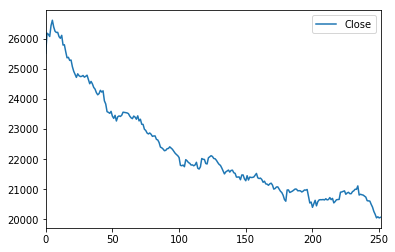

In [4]:
dj_df.plot.line()

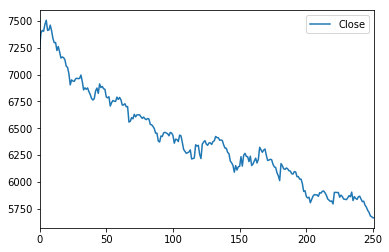

In [5]:
nasdaq_df.plot.line()

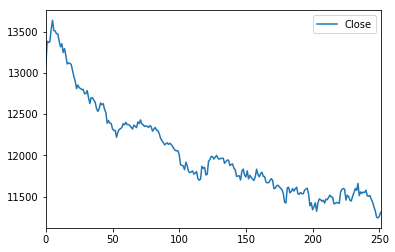

In [6]:
nyse_df.plot.line()

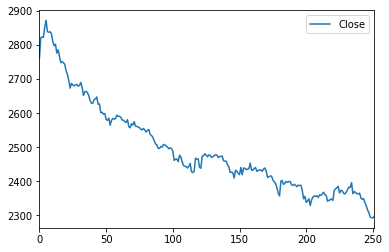

In [7]:
sp500_df.plot.line()